# Modeling of strength of high-performance concrete using regression models

In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer, FunctionTransformer


## Contents

- [Introduction / Dataset Description](#introduction--dataset-description)
- [Analysis Objective](#analysis-objective)
- [Modelling](#modelling)
- [Model Comparison](#model-comparison)
- [Findings & Interpretation](#findings--interpretation)
- [Evaluation & Future Steps](#evaluation--future-steps)

In [170]:
df = pd.read_excel('data/Concrete_Data.xls')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [171]:
df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)": "Cement", 
                   "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "Blast Furnace Slag",
                   "Fly Ash (component 3)(kg in a m^3 mixture)": "Fly Ash",
                   "Water  (component 4)(kg in a m^3 mixture)": "Water",
                   "Superplasticizer (component 5)(kg in a m^3 mixture)": "Superplasticizer",
                   "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": "Coarse Aggregate",
                   "Fine Aggregate (component 7)(kg in a m^3 mixture)": "Fine Aggregate",
                   "Age (day)": "Age",
                   "Concrete compressive strength(MPa, megapascals) ": "Compressive Strength"
                   }, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Blast Furnace Slag    1030 non-null   float64
 2   Fly Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse Aggregate      1030 non-null   float64
 6   Fine Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [172]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


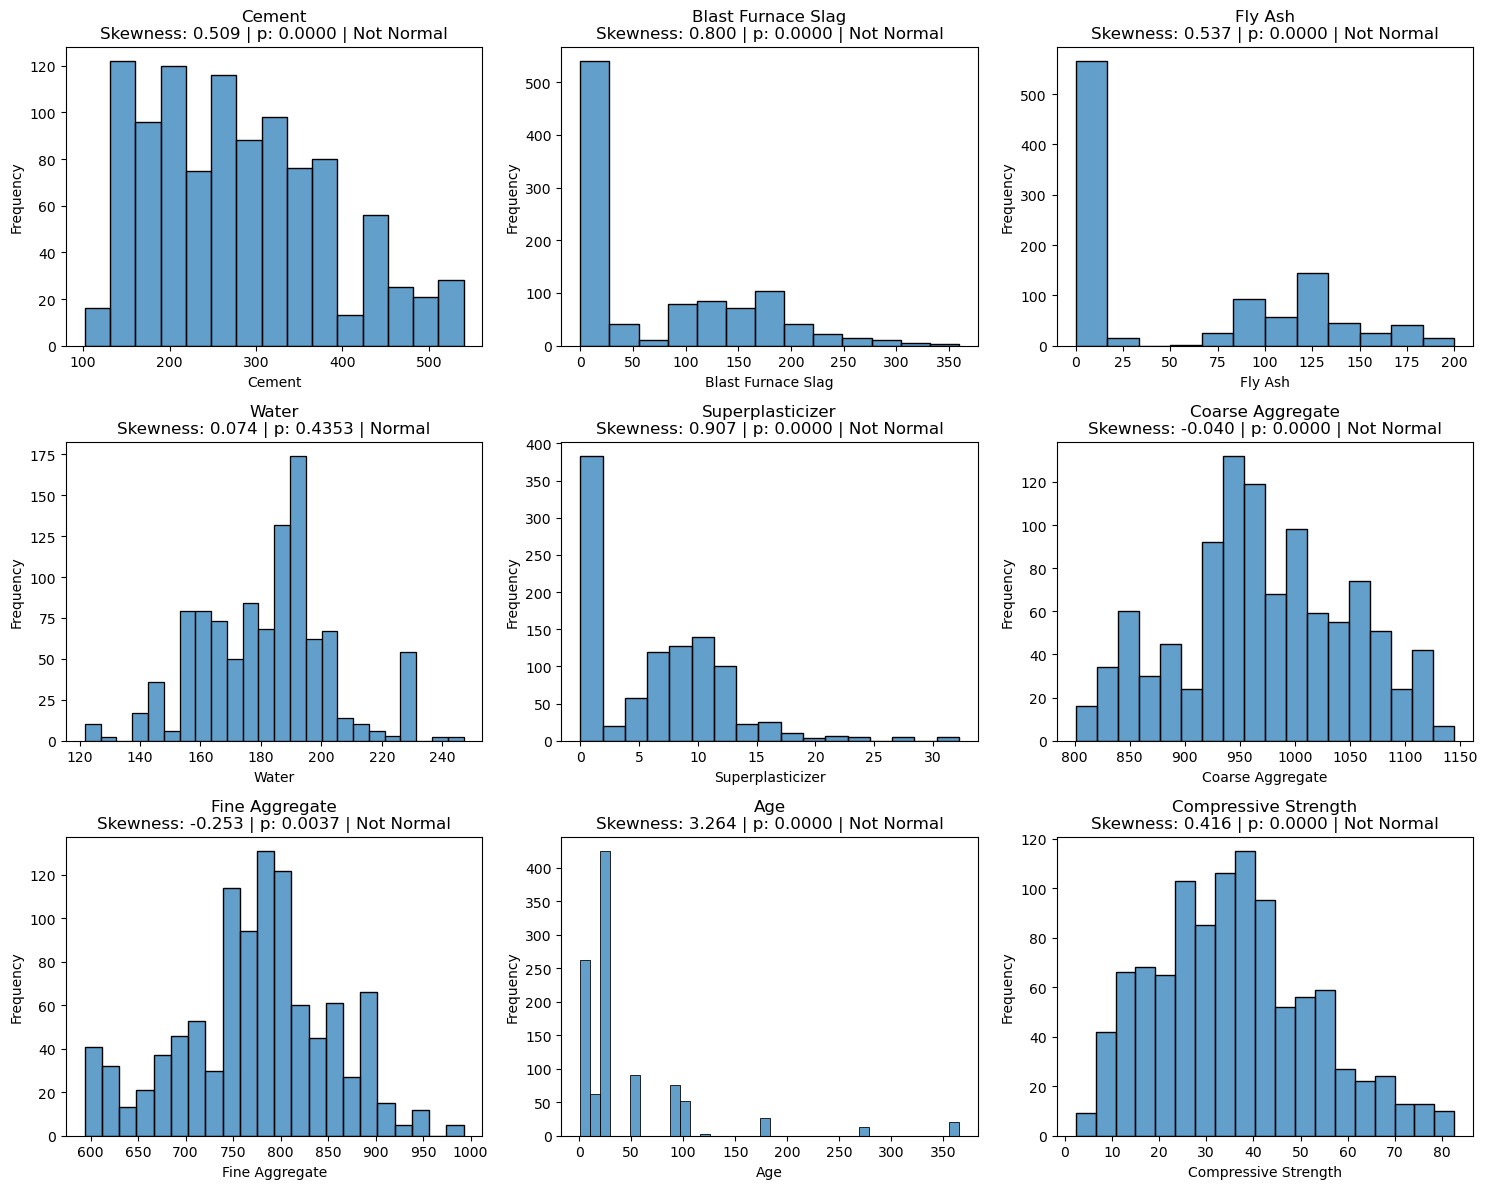

In [173]:
alpha = 0.05

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # fixed grid
axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    
    # Create histogram
    sns.histplot(df[column], alpha=0.7, ax=ax)
    
    # Calculate skewness and normality test
    skewness = stats.skew(df[column])
    shapiro_stat, p_value = stats.normaltest(df[column])
    
    # Hypothesis test result
    is_normal = "Normal" if p_value >= alpha else "Not Normal"
    
    ax.set_title(f'{column}\nSkewness: {skewness:.3f} | p: {p_value:.4f} | {is_normal}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [174]:
X = df.drop("Compressive Strength", axis=1)
y = df["Compressive Strength"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- BoxCox transform Cement
- Box-Cox transform Blast Furnace Slag
- Log transform Fly Ash
- No transform on water
- BoxCox transform on Superplasticizer
- No transform on Coarse Aggregate
- No transform on Fine Aggregate
- Yeo-Johnson transform on Age
- No transform on Concrete Strength (target)

In [176]:
passthrough_transformations = ["Water", "Coarse Aggregate", "Fine Aggregate"]

ct = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p, feature_names_out='one-to-one'), ["Fly Ash"]),
        ('yeojohnson', PowerTransformer(method='yeo-johnson'), ["Age", "Cement", "Blast Furnace Slag", "Superplasticizer"]),
        ('passthrough', 'passthrough', passthrough_transformations)
    ], remainder='drop'
)

ct.fit_transform(X_train)
ct.transform(X_test)

ct.get_feature_names_out()

array(['log__Fly Ash', 'yeojohnson__Age', 'yeojohnson__Cement',
       'yeojohnson__Blast Furnace Slag', 'yeojohnson__Superplasticizer',
       'passthrough__Water', 'passthrough__Coarse Aggregate',
       'passthrough__Fine Aggregate'], dtype=object)

## Introduction / Dataset Description

## Analysis Objective

## Modelling

## Model Comparison

## Findings & Interpretation

## Evaluation & Future Steps